<a href="https://colab.research.google.com/github/SungChul23/Bixby/blob/master/%EC%A0%84%EA%B8%B0%EC%9A%94%EA%B8%88_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum&&sudo fc-cache -fv&&rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (26.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126213 files and direc

In [ ]:
import os
os.listdir('/content/drive/MyDrive/빅데이터 컴퓨팅')


['5주차', '11주차', '12주차', '과제', '14주차', '전기요금분석.xlsx']

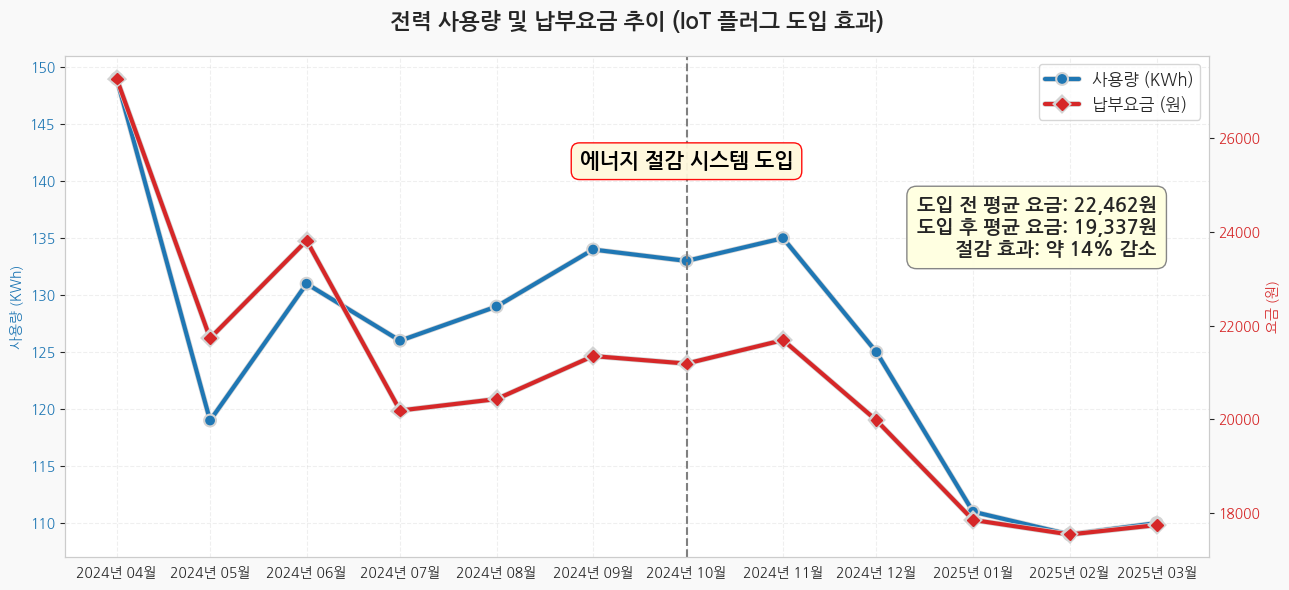

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patheffects as pe
import seaborn as sns

# 스타일 적용
sns.set_style("white")  # 아예 깨끗한 바탕
plt.rcParams['font.family'] = 'NanumGothic'

# 데이터 불러오기
file_path = '/content/drive/MyDrive/빅데이터 컴퓨팅/전기요금분석.csv'
df = pd.read_csv(file_path, encoding='cp949', skiprows=3)
df = df[['사용기간', '사용량(Kwh)', '납부요금']]
df.columns = ['사용기간', '사용량', '납부요금']
df['사용기간'] = pd.to_datetime(df['사용기간'].str.replace('월', '').str.strip(), format='%Y %m')
df['납부요금'] = df['납부요금'].astype(str).str.replace(',', '').astype(int)
df = df.sort_values('사용기간')

# 이벤트 날짜
iot_date = pd.to_datetime('2024-10', format='%Y-%m')
app_bixby_date = pd.to_datetime('2024-11', format='%Y-%m')
advice_push_date = pd.to_datetime('2025-01', format='%Y-%m')

# 요금 절감 효과 분석
before = df[df['사용기간'] < iot_date]['납부요금']
after = df[df['사용기간'] >= iot_date]['납부요금']
avg_before = before.mean()
avg_after = after.mean()
rate = (avg_before - avg_after) / avg_before * 100

# 시각화
fig, ax1 = plt.subplots(figsize=(14, 7))
fig.patch.set_facecolor('#ffffff')  # 완전 하얀 배경

# 사용량 그래프
line1, = ax1.plot(df['사용기간'], df['사용량'], marker='o', linewidth=3, color='#1f77b4',
                  label='사용량 (KWh)',
                  path_effects=[pe.Stroke(linewidth=5, foreground='lightgray'), pe.Normal()])
ax1.set_ylabel('사용량 (KWh)', color='#1f77b4', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#1f77b4')

# 납부요금 그래프
ax2 = ax1.twinx()
line2, = ax2.plot(df['사용기간'], df['납부요금'], marker='D', linewidth=3, color='#d62728',
                  label='납부요금 (원)',
                  path_effects=[pe.Stroke(linewidth=5, foreground='lightgray'), pe.Normal()])
ax2.set_ylabel('요금 (원)', color='#d62728', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#d62728')

# 이벤트 세로선
for event_date in [iot_date, app_bixby_date, advice_push_date]:
    ax1.axvline(x=event_date, color='gray', linestyle='--', linewidth=1.5)

# 이벤트 텍스트 박스
def draw_event(date, y, text, edge_color):
    ax2.text(date, y, text,
             ha='center', va='center',
             fontsize=12, fontweight='bold', color='black',
             bbox=dict(facecolor='#fefefe', edgecolor=edge_color, boxstyle='round,pad=0.5', alpha=0.95))

draw_event(iot_date, 26300, 'IoT 플러그 도입', 'red')
draw_event(app_bixby_date, 25300, '앱 및 빅스비 도입', 'blue')
draw_event(advice_push_date, 24300, '한 줄 조언 및 푸시 알림 도입', 'green')

# X축: 매월 표시
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())  # 모든 월 표시
plt.xticks(rotation=45)

# 십자선(grid) 전부 제거
ax1.grid(False)
ax2.grid(False)

# 범례
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper right', fontsize=12)

# # 요약 박스 강조
ax2.text(df['사용기간'].max(), df['납부요금'].max() - 6500,
          f'도입 전 평균 요금: {avg_before:,.0f}원\n도입 후 평균 요금: {avg_after:,.0f}원\n절감 효과: 약 {rate:.0f}% 감소',
          fontsize=14, fontweight='bold', ha='right', va='top',
          bbox=dict(facecolor='lightyellow', edgecolor='gray', boxstyle='round,pad=0.5', alpha=0.95))

# 제목
plt.title('에너지 절감 시스템 효과', fontsize=18, fontweight='bold', pad=20)

# 레이아웃 조정
plt.tight_layout(pad=2)
plt.show()
